In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [34]:
import io
# Dataset is now stored in a Pandas Dataframe
Data = pd.read_csv(io.BytesIO(uploaded['energydata_complete.csv']))

In [35]:
Data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [36]:
Data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [38]:
Data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [39]:
Data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [40]:
Data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [41]:
Data.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [42]:
Data_drop =Data.drop(["date", "lights"], axis=1)

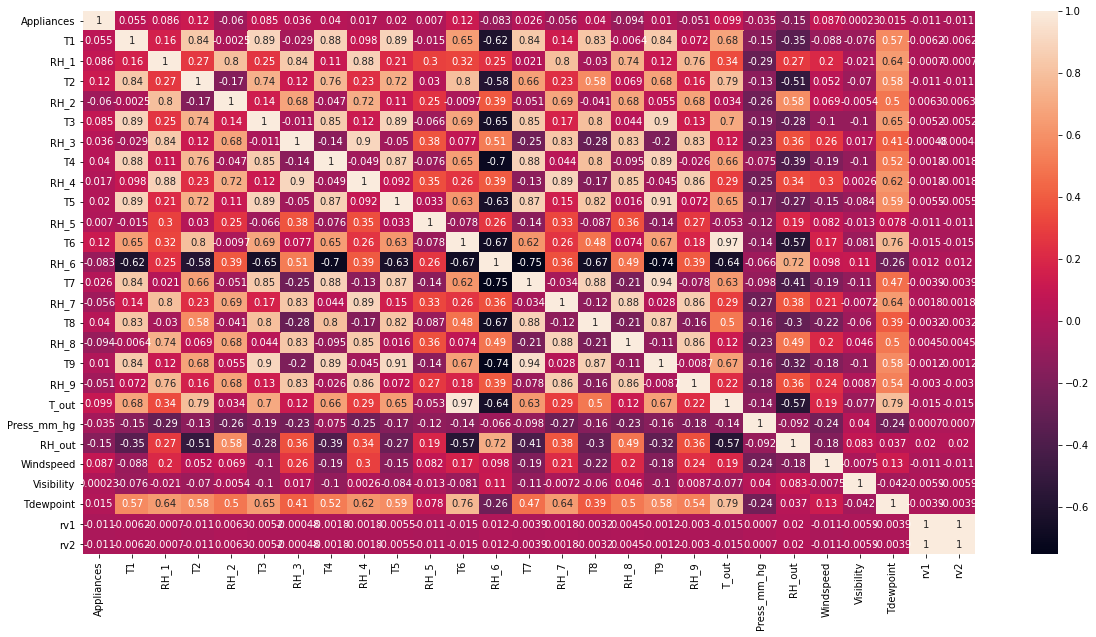

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(Data_drop.corr(), annot=True)
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_Data_drop = pd.DataFrame(scaler.fit_transform(Data_drop), columns=Data_drop.columns)
features_Data_drop = normalised_Data_drop[['T2']]
Appl_target = normalised_Data_drop['T6']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_Data_drop, Appl_target,test_size=0.3, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [48]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.64

In [49]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.08

In [50]:
# Residual Sum of Squares (RSS) 
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

66.12

In [51]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.106

In [52]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
predictions =ridge_reg.predict(x_test)
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3) 

0.106

In [53]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
predictions =ridge_reg.predict(x_test)
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.106

In [54]:
lasso_reg.coef_

array([0.85177991])

In [55]:
new_features =normalised_Data_drop.drop('Appliances', axis=1)
target = normalised_Data_drop['Appliances']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_features, target,test_size=0.3, random_state=42)

In [57]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(X_test)
print(new_features.columns)
print("\n")
print(linear_model.coef_)

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')


[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [70]:
column = []
for col in new_features.columns:
  column.append(col)

analysis = pd.DataFrame(linear_model.coef_, columns=['coefficient'])
analysis['feature'] = column
analysis

,coefficient,feature
0,-0.003281,T1
1,0.553547,RH_1
2,-0.236178,T2
3,-0.456698,RH_2
4,0.290627,T3
5,0.096048,RH_3
6,0.028981,T4
7,0.026386,RH_4
8,-0.015657,T5
9,0.016006,RH_5


In [71]:
x = new_features
y = target
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_train_score=lr.score(x_train,y_train)
lr_test_score=lr.score(x_test,y_test)
print ("LR training score:", lr_train_score) 
print ("LR test score: ", lr_test_score)

training score: 0.0
test score:  -1.1536689688007586e-06
number of features used:  0
training score for alpha=0.01: 0.0
test score for alpha =0.01:  -1.1536689688007586e-06
number of features used: for alpha =0.01: 0
training score for alpha=0.0001: 0.13192682814450418
test score for alpha =0.0001:  0.13432492607212543
number of features used: for alpha =0.0001: 16
LR training score: 0.14471942308518737
LR test score:  0.14890246319303535


In [72]:
lr.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

In [74]:
#from sklearn.linear_model import Lasso
#lasso_reg = Lasso(alpha=0.001)
#lasso_reg.fit(x_train, y_train)
#predictions =lasso_reg.predict(x_test)
#Root Mean Square Error (RMSE)
x = new_features
y = target
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error
predictions = lasso.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.094